<a href="https://colab.research.google.com/github/gonensel/AoopHW1/blob/main/HW1DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch:  0  loss: 1.18722117
epoch:  1  loss: 1.08193791
epoch:  2  loss: 1.02679777
epoch:  3  loss: 0.97955191
epoch:  4  loss: 0.92585051
epoch:  5  loss: 0.86829329
epoch:  6  loss: 0.81020021
epoch:  7  loss: 0.75389391
epoch:  8  loss: 0.69587553
epoch:  9  loss: 0.63660449
epoch: 10  loss: 0.58345395
epoch: 11  loss: 0.54064453
epoch: 12  loss: 0.50663650
epoch: 13  loss: 0.47764105
epoch: 14  loss: 0.45342359
epoch: 15  loss: 0.43267837
epoch: 16  loss: 0.41529605
epoch: 17  loss: 0.40076181
epoch: 18  loss: 0.38621059
epoch: 19  loss: 0.36987558
epoch: 20  loss: 0.35301664
epoch: 21  loss: 0.33686897
epoch: 22  loss: 0.31986374
epoch: 23  loss: 0.30148068
epoch: 24  loss: 0.28378987
epoch: 25  loss: 0.26542714
epoch: 26  loss: 0.24555324
epoch: 27  loss: 0.22684629
epoch: 28  loss: 0.20842937
epoch: 29  loss: 0.19249673
epoch: 30  loss: 0.17720731
epoch: 31  loss: 0.16223991
epoch: 32  loss: 0.14921764
epoch: 33  loss: 0.13807693
epoch: 34  loss: 0.12859316
epoch: 35  loss: 0.1

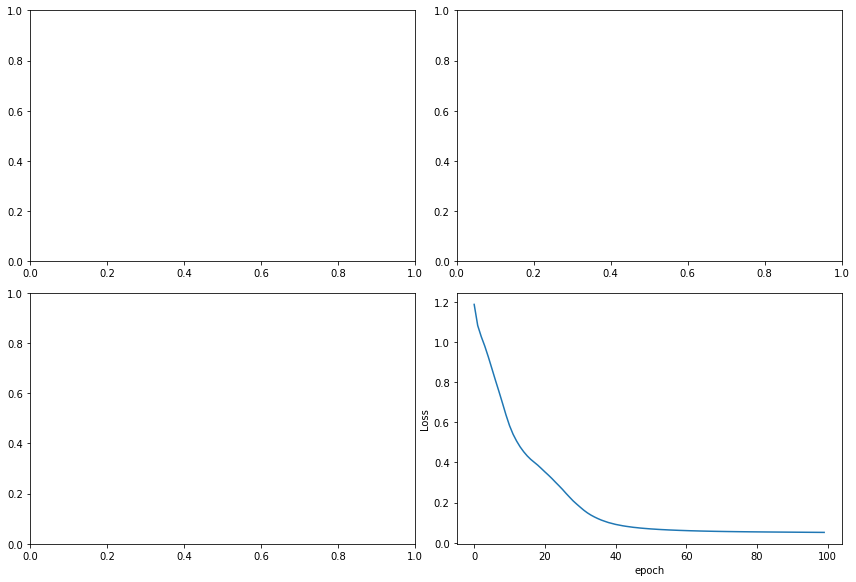

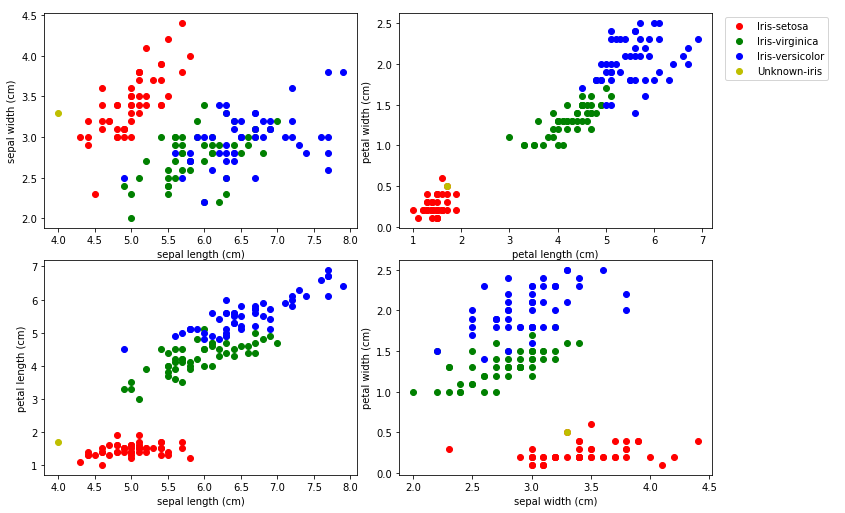

tensor([  9.6742,   3.1722, -11.5736])

Iris-setosa


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/iris.data")

dataset.columns = ["sepal length (cm)",
                   "sepal width (cm)",
                   "petal length (cm)",
                   "petal width (cm)",
                   "species"]


mappings = {
   "Iris-setosa": 0,
   "Iris-versicolor": 1,
   "Iris-virginica": 2
}
dataset["species"] = dataset["species"].apply(lambda x: mappings[x])

dataset.head()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ["r", "g", "b"]
labels = ["Iris-setosa","Iris-virginica","Iris-versicolor"]



X = dataset.drop("species",axis=1).values
y = dataset["species"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=25, hidden_layer2=30, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


plt.plot(range(epochs), [float(l) for l in losses ])
plt.ylabel('Loss')
plt.xlabel('epoch')

preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

# print(tabulate(df, headers='keys'))

unknown_iris = torch.tensor([4.0,3.3,1.7,0.5])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout()

plots = [(0, 1), (2, 3), (0, 2), (1, 3)]
colors = ['r', 'g', 'b']
labels = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Unknown-iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = dataset.columns[plots[i][0]]
        y = dataset.columns[plots[i][1]]
        ax.scatter(dataset[dataset["species"] == j][x], dataset[dataset["species"] == j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Add a plot for our mystery iris:
    ax.scatter(unknown_iris[plots[i][0]], unknown_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()


with torch.no_grad():
    print(model(unknown_iris))
    print()
    print(labels[model(unknown_iris).argmax()])